In [ ]:
# !!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!

# Test Prophet - x vx. x_reg - w/ latest data (till 1/13/2019)
# see Mtg-1-15-19.xlsx for list of tests

# !!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!
# !!!!!!!!!!!!!!!!!!!!!!!!

In [1]:
import pandas as pd
#data = pd.read_csv('test_6m_nb.csv') # 6 months of AMR NotPaid
#data = pd.read_csv('test_All_nb.csv') # All of AMR NotPaid
#data = pd.read_csv('test_All_nb_2017-18.csv') # Excl. 2016 data AMR NotPaid
#data = pd.read_csv('test_All_SoEu_Paid.csv')
#data = pd.read_csv('test_All_AMR_Paid.csv')
#data = pd.read_csv('test_All_FR_Paid.csv')
#data = pd.read_csv('All_data_1124.csv')
#data = pd.read_csv('All_data_1124_2017-18.csv')
#data = pd.read_csv('All_data_1124_2017-18-19.csv')
data = pd.read_csv('All_data_Jan19.csv')  # All Data (2016-2019) till 1/13/2019
#data = pd.read_csv('All_data_Jan19_2017-19.csv')  # 2017-2019 Data till 1/13/2019
#data = pd.read_csv('All_data_Jan19_AMR.csv')  # All Data (2016-2019) till 1/13/2019
#data = pd.read_csv('All_data_Jan19_EU.csv')  # All Data (2016-2019) till 1/13/2019

#data = data[(data['ds'] > '12/31/16')]
#data[(data['ds'] > '2016-12-31') & (df['date'] < '2013-02-01')]

data.shape
data.head()

,ds,visits,listings,y
0,1/1/16,2293712,28296771,7507
1,1/2/16,2620436,28205540,9256
2,1/3/16,3186849,28194192,11461
3,1/4/16,3317763,28349902,12836
4,1/5/16,3267402,28373795,13884


In [2]:
data.shape

(1109, 4)

In [3]:
import numpy as np
import pandas as pd
import itertools
#import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from fbprophet import Prophet
#from fbprophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr

# Testing AMR_NotPaid_Prophet_Hols

def ProphetFxnNone(df, daysForecast):

    easter = pd.DataFrame({
        'holiday': 'easterSunday',
        'ds': pd.to_datetime(['2010-04-04','2011-04-24','2012-04-08','2013-03-31','2014-04-20',
                              '2015-04-05','2016-03-27','2017-04-16','2018-04-01','2019-04-21',
                            '2020-04-12','2021-04-04','2022-04-17','2023-04-09','2024-03-31']),
        'lower_window': -2,
        'upper_window': 0,
    })
    
    memorial = pd.DataFrame({
        'holiday': 'memorialMonday',
        'ds': pd.to_datetime(['2010-05-31','2011-05-30','2012-05-28','2013-05-27','2014-05-26',
                            '2015-05-25','2016-05-30','2017-05-29','2018-05-28','2019-05-27',
                            '2020-05-25','2021-05-31','2022-05-30','2023-05-29','2024-05-27']),
        'lower_window': -2,
        'upper_window': 0,
    })
    
    laborday = pd.DataFrame({
        'holiday': 'laborMonday',
        'ds': pd.to_datetime(['2010-09-6','2011-09-5','2012-09-3','2013-09-2','2014-09-1',
                            '2015-09-7','2016-09-5','2017-09-4','2018-09-3','2019-09-2',
                            '2020-09-7','2021-09-6','2022-09-5','2023-09-4','2024-09-2']),
        'lower_window': -2,
        'upper_window': 0,
    })
        
    thxgiving = pd.DataFrame({
        'holiday': 'thanksgiving',
        'ds': pd.to_datetime(['2010-11-25','2011-11-24','2012-11-22','2013-11-28','2014-11-27',
                            '2015-11-26','2016-11-24','2017-11-23','2018-11-22','2019-11-28',
                            '2020-11-26','2021-11-25','2022-11-24','2023-11-23','2024-11-28',]),
        'lower_window': 0,
        'upper_window': 1,
    })
    
    holidays = pd.concat((easter, memorial, laborday, thxgiving))
    
    # -------------------
    #x5 - best so far 
    
    changepoints=['2018-01-01','2018-01-04','2018-01-07','2018-01-09','2018-01-11',
                  '2018-01-13','2018-01-16','2018-01-20','2018-01-24','2018-01-31',
                  '2018-03-13','2018-03-16','2018-03-20','2018-03-24','2018-03-31']

    m = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = False,
                seasonality_mode='multiplicative')
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    m.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts

# -------------------

    m.fit(df)
       
    future = m.make_future_dataframe(periods=daysForecast)
    forecast = m.predict(future)
    return forecast['yhat']

/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:794: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


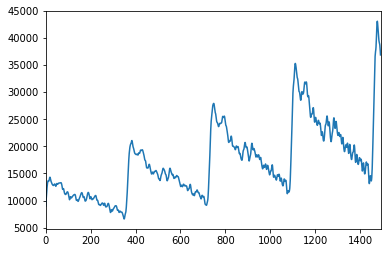

In [4]:
x_All_Jan19_AMR = ProphetFxnNone(data, 383)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_All_Jan19_AMR.plot()

In [44]:
x_All_Jan19_AMR = pd.DataFrame(x_All_Jan19_AMR)
x_All_Jan19_AMR.to_csv("x_All_Jan19_AMR.csv")

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


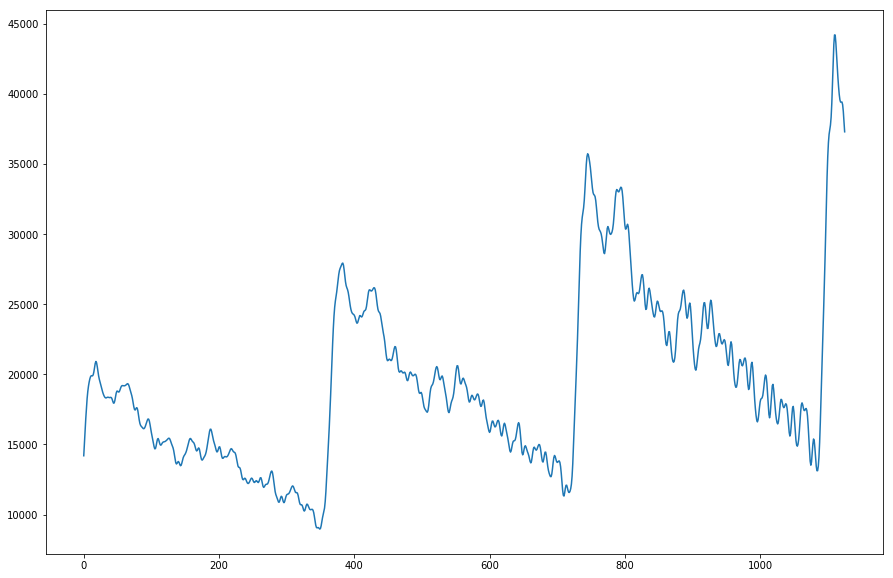

In [42]:
x_All_Jan19_2017_19 = ProphetFxnNone(data, 383)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_All_Jan19_2017_19.plot()

In [45]:
"""
add regressors to Prophet
"""
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr

def ProphetFxnNone(df, daysForecast):

    m = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='multiplicative')
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    m.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts
    
    m.add_regressor('visits')
    m.fit(df)
        
    vis = ProphetVisitsNone(df, daysForecast)
    vis = pd.DataFrame(vis)
    vis.columns = ['visits']

    future_ds = m.make_future_dataframe(periods=daysForecast)
    future = pd.concat([future_ds,vis],axis=1)
    future.columns = ['ds', 'visits']
    
    forecast = m.predict(future)
    return forecast['yhat']

def ProphetVisitsNone(df, daysForecast):

    df = df[['ds', 'visits']]
    df.columns = ['ds', 'y']

    v = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='multiplicative')
    v.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    v.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts

    v.fit(df)
    
    future = v.make_future_dataframe(periods=daysForecast)
    
    forecast = v.predict(future)
    vis = forecast['yhat']
    vis.columns = ['visits_fcst']
    return vis

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


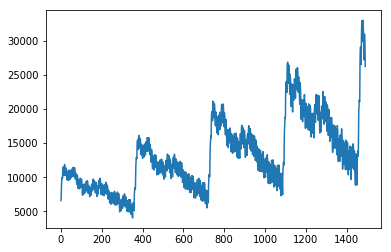

In [46]:
x_All_Jan19_visits_AMR = ProphetFxnNone(data, 383)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_All_Jan19_visits_AMR.plot()



In [36]:
x_All_Jan19_visits_AMR = pd.DataFrame(x_All_Jan19_visits_AMR)
x_All_Jan19_visits_AMR.to_csv("x_All_Jan19_visits_AMR.csv")

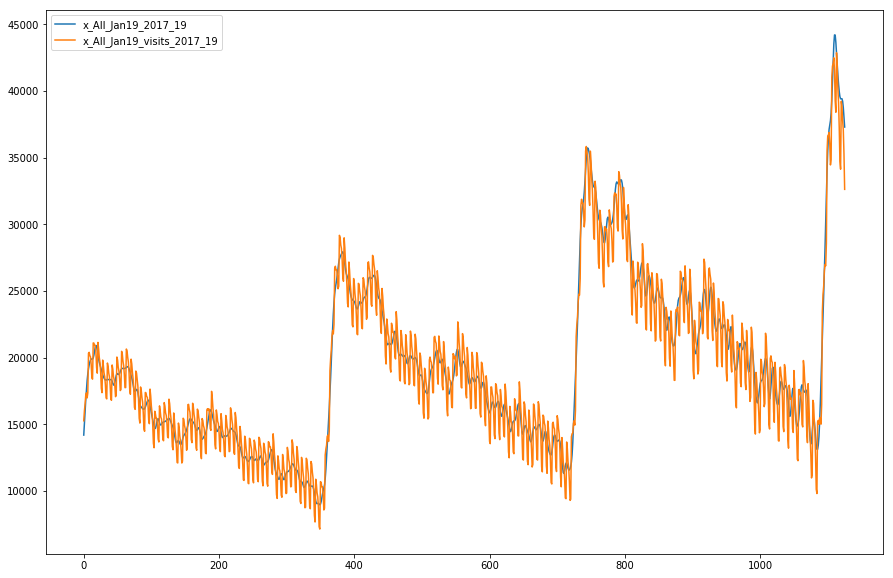

In [47]:
prophet_fcst = pd.concat([x_All_Jan19_2017_19, x_All_Jan19_visits_2017_19], axis=1)
prophet_fcst.columns = ['x_All_Jan19_2017_19', 'x_All_Jan19_visits_2017_19']

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

prophet_fcst.plot()

In [4]:
"""
add regressors to Prophet
"""
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr

def ProphetFxnNone(df, daysForecast):

    m = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='multiplicative')
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    m.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts
    
    m.add_regressor('listings')
    m.fit(df)
        
    vis = ProphetVisitsNone(df, daysForecast)
    vis = pd.DataFrame(vis)
    vis.columns = ['listings']

    future_ds = m.make_future_dataframe(periods=daysForecast)
    future = pd.concat([future_ds,vis],axis=1)
    future.columns = ['ds', 'listings']
    
    forecast = m.predict(future)
    return forecast['yhat']

def ProphetVisitsNone(df, daysForecast):

    df = df[['ds', 'listings']]
    df.columns = ['ds', 'y']

    v = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='multiplicative')
    v.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    v.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts

    v.fit(df)
    
    future = v.make_future_dataframe(periods=daysForecast)
    
    forecast = v.predict(future)
    vis = forecast['yhat']
    vis.columns = ['listings_fcst']
    return vis

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


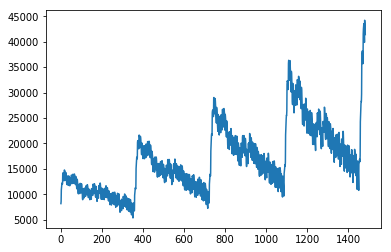

In [5]:
x_Prophet_Xreg_All_DOW = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_All_DOW.plot()

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


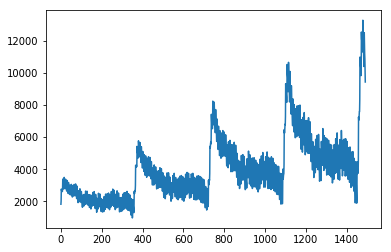

In [38]:
x_All_Jan19_listings_EU = ProphetFxnNone(data, 383)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_All_Jan19_listings_EU.plot()


In [39]:
x_All_Jan19_listings_EU = pd.DataFrame(x_All_Jan19_listings_EU)
x_All_Jan19_listings_EU.to_csv("x_All_Jan19_listings_EU.csv")

## Predicting AWS Spend

In [6]:
import pandas as pd
aws_eu = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/EU_Paid_Spend_20190122.csv')
aws_eu.head()
#X = aws_eu['Spend Amount USD']
#X.head()

,Date,Net Bookings,Spend Amount USD
0,1/1/16,191,34350
1,1/2/16,358,64249
2,1/3/16,534,89417
3,1/4/16,548,97478
4,1/5/16,585,93398


In [7]:
data = aws_eu[['Date', 'Spend Amount USD']]
data.columns = ['ds', 'y']
data.head()

,ds,y
0,1/1/16,34350
1,1/2/16,64249
2,1/3/16,89417
3,1/4/16,97478
4,1/5/16,93398


/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


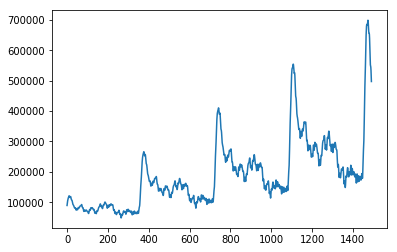

In [9]:
x_AWS_EU = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20), 374 (Jan23)
x_AWS_EU.plot()

In [12]:
x_AWS_EU = pd.DataFrame(x_AWS_EU)
x_AWS_EU.to_csv("x_AWS_EU.csv")

In [10]:
import pandas as pd
aws_amr = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/NA_Paid_Spend_20190122.csv')
aws_amr.head()
data = aws_amr[['Date', 'Spend Amount USD']]
data.columns = ['ds', 'y']
data.head()

,ds,y
0,1/1/16,61842
1,1/2/16,79724
2,1/3/16,89523
3,1/4/16,84218
4,1/5/16,89471


/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


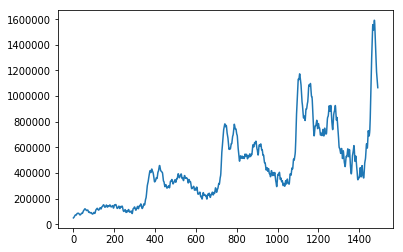

In [11]:
x_AWS_AMR = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20), 374 (Jan23)
x_AWS_AMR.plot()

In [13]:
x_AWS_AMR = pd.DataFrame(x_AWS_AMR)
x_AWS_AMR.to_csv("x_AWS_AMR.csv")

In [14]:
# ------------------------------------------
# PROPHET MODEL W/ XREG AS PROPHET & SARIMA
# ------------------------------------------

import pandas as pd
aws_eu = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/EU_Paid_Spend_20190122.csv')
aws_eu.head()

,Date,Net Bookings,Spend Amount USD
0,1/1/16,191,34350
1,1/2/16,358,64249
2,1/3/16,534,89417
3,1/4/16,548,97478
4,1/5/16,585,93398


In [15]:
data = aws_eu[['Date', 'Net Bookings', 'Spend Amount USD']]
data.columns = ['ds', 'y', 'aws']
data.head()

,ds,y,aws
0,1/1/16,191,34350
1,1/2/16,358,64249
2,1/3/16,534,89417
3,1/4/16,548,97478
4,1/5/16,585,93398


In [24]:
import pandas as pd
aws_amr = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/NA_Paid_Spend_20190122.csv')
aws_amr.head()

,Date,Net Bookings,Spend Amount USD
0,1/1/16,817,61842
1,1/2/16,1119,79724
2,1/3/16,1429,89523
3,1/4/16,1562,84218
4,1/5/16,1696,89471


In [25]:
data = aws_amr[['Date', 'Net Bookings', 'Spend Amount USD']]
data.columns = ['ds', 'y', 'aws']
data.head()

,ds,y,aws
0,1/1/16,817,61842
1,1/2/16,1119,79724
2,1/3/16,1429,89523
3,1/4/16,1562,84218
4,1/5/16,1696,89471


In [3]:
# -------------------------------
# PROPHET MODEL W/ XREG AS PROPHET
# -------------------------------

"""
add regressors to Prophet
"""
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr

def ProphetFxnNone(df, daysForecast):

    m = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='multiplicative')
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    m.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts
    
    m.add_regressor('aws')
    m.fit(df)
        
    vis = ProphetVisitsNone(df, daysForecast)
    vis = pd.DataFrame(vis)
    vis.columns = ['aws']

    future_ds = m.make_future_dataframe(periods=daysForecast)
    future = pd.concat([future_ds,vis],axis=1)
    future.columns = ['ds', 'aws']
    
    forecast = m.predict(future)
    return forecast['yhat']

def ProphetVisitsNone(df, daysForecast):

    df = df[['ds', 'aws']]
    df.columns = ['ds', 'y']

    v = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='multiplicative')
    v.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    v.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts

    v.fit(df)
    
    future = v.make_future_dataframe(periods=daysForecast)
    
    forecast = v.predict(future)
    vis = forecast['yhat']
    vis.columns = ['aws_fcst']
    return vis

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


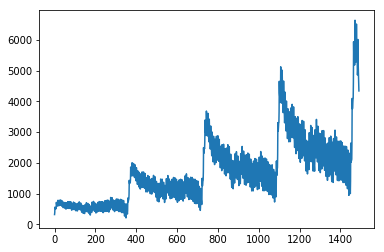

In [18]:
x_Prophet_Xreg_EU = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_EU.plot()

In [19]:
x_Prophet_Xreg_EU = pd.DataFrame(x_Prophet_Xreg_EU)
x_Prophet_Xreg_EU.to_csv("x_Prophet_Xreg_EU.csv")

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


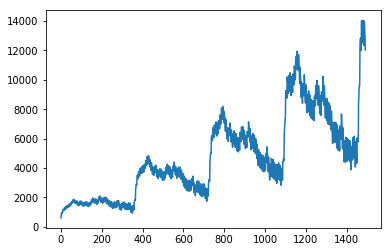

In [27]:
x_Prophet_Xreg_AMR = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_AMR.plot()

In [28]:
x_Prophet_Xreg_AMR = pd.DataFrame(x_Prophet_Xreg_AMR)
x_Prophet_Xreg_AMR.to_csv("x_Prophet_Xreg_AMR.csv")

In [29]:
# -------------------------------
# PROPHET MODEL W/ XREG AS SARIMA
# -------------------------------

"""
add regressors to Prophet
"""
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr

def ProphetFxnNone(df, daysForecast):

    m = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='multiplicative')
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    m.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts
    
    m.add_regressor('aws')
    m.fit(df)
        
    vis = r_SarimaFxn(df, daysForecast)
    vis = pd.DataFrame(vis)
    vis.columns = ['aws']

    future_ds = m.make_future_dataframe(periods=daysForecast)
    future = pd.concat([future_ds,vis],axis=1)
    future.columns = ['ds', 'aws']
    
    forecast = m.predict(future)
    return forecast['yhat']

import pandas as pd
import pyper as pr

def r_SarimaFxn(df, fcstdays):
    
    df = df[['ds', 'aws']]
    df.columns = ['ds', 'y']

    r = pr.R()
    r.assign("rDF", df)
    r.assign("h", fcstdays)
    r("library(forecast)")
    r("ts_data <- ts(rDF$y, start=2016,freq=365)")
    r("model_sorder <- auto.arima(ts_data, D=1)")
    r("asorder <- model_sorder$arma[c(1, 6, 2, 3, 7, 4, 5)]")
    r("names(asorder) <- c('p', 'd', 'q', 'P', 'D', 'Q', 'Frequency')")
    r("model_fit_s <- stlm(ts_data, modelfunction=Arima,order=c(asorder[1],asorder[2],asorder[3]),seasonal=list(order=c(asorder[4],asorder[5],asorder[6])))")
    r("fit_sarima_fc <- forecast(model_fit_s, h=h)")    
    r("df_sarima <- c(fit_sarima_fc$fitted, fit_sarima_fc$mean)")
    r_sarima_series = pd.DataFrame(r.get("df_sarima"))
    r_sarima_series = r_sarima_series[0].values
    vis = pd.Series(r_sarima_series)
    return vis


/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


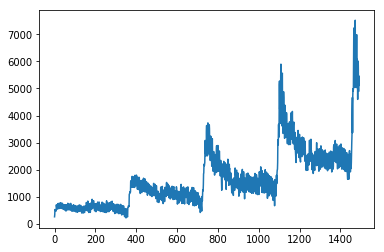

In [21]:
x_Prophet_Xreg_Sarima_EU = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_Sarima_EU.plot()

In [22]:
x_Prophet_Xreg_Sarima_EU = pd.DataFrame(x_Prophet_Xreg_Sarima_EU)
x_Prophet_Xreg_Sarima_EU.to_csv("x_Prophet_Xreg_Sarima_EU.csv")

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


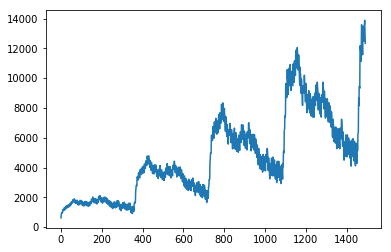

In [30]:
x_Prophet_Xreg_Sarima_AMR = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_Sarima_AMR.plot()

In [31]:
x_Prophet_Xreg_Sarima_AMR = pd.DataFrame(x_Prophet_Xreg_Sarima_AMR)
x_Prophet_Xreg_Sarima_AMR.to_csv("x_Prophet_Xreg_Sarima_AMR.csv")

In [43]:
# -------------------------------------
# Run Prophet for EU/AMR paid/not paid
# -------------------------------------

import pandas as pd
#data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/NA_Paid_Spend_20190122.csv')
#data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/EU_Paid_Spend_20190122.csv')
#data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/NA_NotPaid_20190122.csv')
data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/rPy/AWS/EU_NotPaid_20190122.csv')
#data = data[['Date', 'Net Bookings', 'Spend Amount USD']]
data = data[['Date', 'NB']]
#data.columns = ['ds', 'y', 'aws']
data.columns = ['ds', 'y']
data.head()

,ds,y
0,1/1/16,1413
1,1/2/16,1543
2,1/3/16,1672
3,1/4/16,1796
4,1/5/16,1915


/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


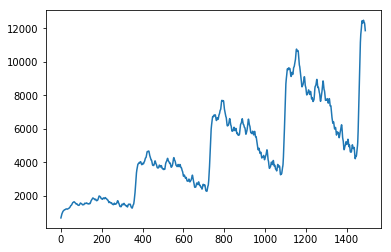

In [36]:
x_Prophet_Paid_amr = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20), 374 (+Jan23)
x_Prophet_Paid_amr.plot()

x_Prophet_Paid_amr = pd.DataFrame(x_Prophet_Paid_amr)
x_Prophet_Paid_amr.to_csv("x_Prophet_Paid_amr.csv")

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


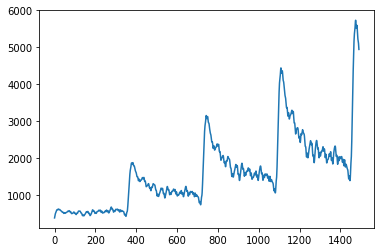

In [38]:
x_Prophet_Paid_eu = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20), 374 (+Jan23)
x_Prophet_Paid_eu.plot()

x_Prophet_Paid_eu = pd.DataFrame(x_Prophet_Paid_eu)
x_Prophet_Paid_eu.to_csv("x_Prophet_Paid_eu.csv")

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


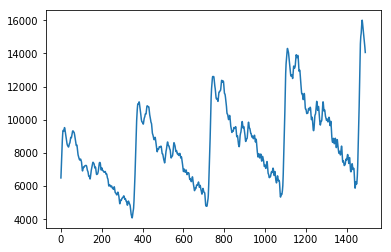

In [42]:
x_Prophet_NotPaid_amr = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20), 374 (+Jan23)
x_Prophet_NotPaid_amr.plot()

x_Prophet_NotPaid_amr = pd.DataFrame(x_Prophet_NotPaid_amr)
x_Prophet_NotPaid_amr.to_csv("x_Prophet_NotPaid_amr.csv")

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


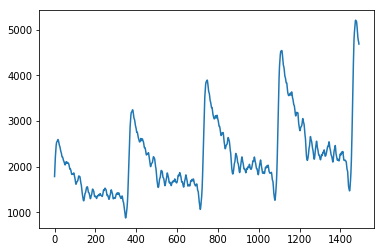

In [44]:
x_Prophet_NotPaid_eu = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20), 374 (+Jan23)
x_Prophet_NotPaid_eu.plot()

x_Prophet_NotPaid_eu = pd.DataFrame(x_Prophet_NotPaid_eu)
x_Prophet_NotPaid_eu.to_csv("x_Prophet_NotPaid_eu.csv")


In [ ]:
# LOOK INTO ARIMA/SARIMA FOR EU/AMR PAID/NOT PAID.....
# USE Arima_Sarima_PypeR.ipynb
# PLUG THESE INTO THE SPREADSHEET

In [17]:
import pandas as pd
#data = pd.read_csv('test_6m_nb.csv') # 6 months of AMR NotPaid
#data = pd.read_csv('test_All_nb.csv') # All of AMR NotPaid
#data = pd.read_csv('test_All_nb_2017-18.csv') # Excl. 2016 data AMR NotPaid
#data = pd.read_csv('test_All_SoEu_Paid.csv')
#data = pd.read_csv('test_All_AMR_Paid.csv')
#data = pd.read_csv('test_All_FR_Paid.csv')
#data = pd.read_csv('All_data_1124.csv')
#data = pd.read_csv('All_data_1124_2017-18.csv')
#data = pd.read_csv('All_data_1124_2017-18-19.csv')
#data = pd.read_csv('All_data_Jan19.csv')  # All Data (2016-2019) till 1/13/2019
#data = pd.read_csv('All_data_Jan19_2017-19.csv')  # 2017-2019 Data till 1/13/2019
#data = pd.read_csv('All_data_Jan19_AMR.csv')  # All Data (2016-2019) till 1/13/2019
#data = pd.read_csv('All_data_Jan19_EU.csv')  # All Data (2016-2019) till 1/13/2019

#data = data[(data['ds'] > '12/31/16')]
#data[(data['ds'] > '2016-12-31') & (df['date'] < '2013-02-01')]

#data = pd.read_csv('All_data_Jan19_DOW.csv')  # All Data, sundays, mondays
#data = pd.read_csv('All_data_1124_DOW.csv')
data = pd.read_csv('All_data_Jan19_1130_DOW.csv')

data.shape
data.head()

,ds,visits,listings,y,dow,mon,year,Sunday,Monday
0,1/1/16,2293712,28296771,7507,6,1,2016,0,0
1,1/2/16,2620436,28205540,9256,7,1,2016,0,0
2,1/3/16,3186849,28194192,11461,1,1,2016,1,0
3,1/4/16,3317763,28349902,12836,2,1,2016,0,1
4,1/5/16,3267402,28373795,13884,3,1,2016,0,0


In [21]:
"""
add regressors to Prophet
TEST DOW (SUNDAYS, MONDAYS) AS A DUMMY XREG
"""
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr

def ProphetFxnNone(df, daysForecast):

    m = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='additive')
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='additive') # 12 equal parts
    m.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='additive') # 4 equal parts
    
    m.add_regressor('Sunday')
    m.fit(df)
        
    vis = ProphetVisitsNone(df, daysForecast)
    vis = pd.DataFrame(vis)
    vis.columns = ['Sunday']

    future_ds = m.make_future_dataframe(periods=daysForecast)
    future = pd.concat([future_ds,vis],axis=1)
    future.columns = ['ds', 'Sunday']
    
    forecast = m.predict(future)
    return forecast['yhat']

def ProphetVisitsNone(df, daysForecast):

    df = df[['ds', 'Sunday']]
    df.columns = ['ds', 'y']

    v = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = True,
                seasonality_mode='additive')
    v.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='additive') # 12 equal parts
    v.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='additive') # 4 equal parts

    v.fit(df)
    
    future = v.make_future_dataframe(periods=daysForecast)
    
    forecast = v.predict(future)
    vis = forecast['yhat']
    vis.columns = ['Sunday_fcst']
    return vis

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


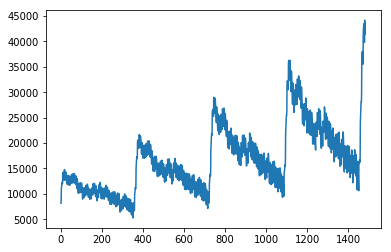

In [8]:
x_Prophet_Xreg_All_DOW = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_All_DOW.plot()

In [9]:
#x_Prophet_Xreg_All_DOW = ProphetFxnNone(data, 374)
#x_Prophet_Xreg_All_DOW.plot()
x_Prophet_Xreg_All_DOW = pd.DataFrame(x_Prophet_Xreg_All_DOW)
x_Prophet_Xreg_All_DOW.to_csv("x_Prophet_Xreg_All_DOW.csv")

/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


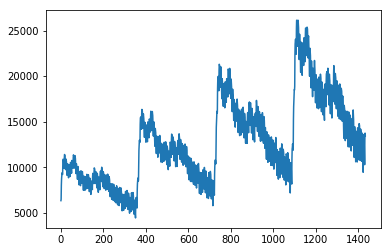

In [15]:
x_Prophet_Xreg_All_1124_DOW = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_All_1124_DOW.plot()


In [16]:
x_Prophet_Xreg_All_1124_DOW = pd.DataFrame(x_Prophet_Xreg_All_1124_DOW)
x_Prophet_Xreg_All_1124_DOW.to_csv("x_Prophet_Xreg_All_1124_DOW.csv")


/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


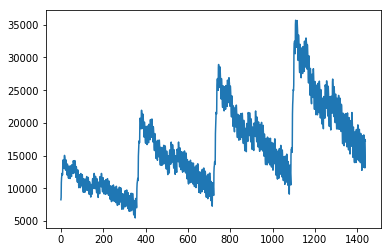

In [19]:
x_Prophet_Xreg_All_1130_Jan19_DOW = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_All_1130_Jan19_DOW.plot()


In [20]:
x_Prophet_Xreg_All_1130_Jan19_DOW = pd.DataFrame(x_Prophet_Xreg_All_1130_Jan19_DOW)
x_Prophet_Xreg_All_1130_Jan19_DOW.to_csv("x_Prophet_Xreg_All_1130_Jan19_DOW.csv")


/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


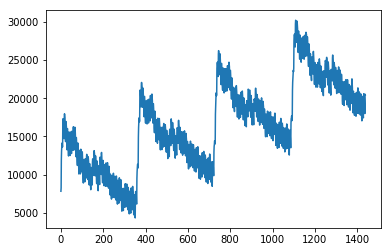

In [22]:
x_Prophet_Xreg_All_1130_Jan19_add_DOW = ProphetFxnNone(data, 374)  # use 442 (10/15/18), 402 (11/24/18), 352 (1/13/19), 383 (+Jan20)
x_Prophet_Xreg_All_1130_Jan19_add_DOW.plot()


In [23]:
x_Prophet_Xreg_All_1130_Jan19_add_DOW = pd.DataFrame(x_Prophet_Xreg_All_1130_Jan19_add_DOW)
x_Prophet_Xreg_All_1130_Jan19_add_DOW.to_csv("x_Prophet_Xreg_All_1130_Jan19_add_DOW.csv")

In [ ]:
# Grid Searching Prophet Model Params

In [2]:
import pandas as pd
data = pd.read_csv('/Users/akuppam/Documents/Hprog/Py/AllMetrics_Jan31/AllData.csv')
data = data[['ds', 'nb']]
data.columns = ['ds', 'y']
data.shape
data.head()
#df_SoEu = df.loc[(df['region'] == 'SoEu') & (df['marketing'] == 'Paid')]

,ds,y
0,1/1/17,11143
1,1/2/17,16220
2,1/3/17,17303
3,1/4/17,19537
4,1/5/17,18069


In [ ]:
import numpy as np
import pandas as pd
import itertools
#import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from fbprophet import Prophet
#from fbprophet.diagnostics import cross_validation
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import logging
import warnings
import pyper as pr

# Testing AMR_NotPaid_Prophet_Hols

def ProphetFxnNone(df, daysForecast):

    easter = pd.DataFrame({
        'holiday': 'easterSunday',
        'ds': pd.to_datetime(['2010-04-04','2011-04-24','2012-04-08','2013-03-31','2014-04-20',
                              '2015-04-05','2016-03-27','2017-04-16','2018-04-01','2019-04-21',
                            '2020-04-12','2021-04-04','2022-04-17','2023-04-09','2024-03-31']),
        'lower_window': -2,
        'upper_window': 0,
    })
    
    memorial = pd.DataFrame({
        'holiday': 'memorialMonday',
        'ds': pd.to_datetime(['2010-05-31','2011-05-30','2012-05-28','2013-05-27','2014-05-26',
                            '2015-05-25','2016-05-30','2017-05-29','2018-05-28','2019-05-27',
                            '2020-05-25','2021-05-31','2022-05-30','2023-05-29','2024-05-27']),
        'lower_window': -2,
        'upper_window': 0,
    })
    
    laborday = pd.DataFrame({
        'holiday': 'laborMonday',
        'ds': pd.to_datetime(['2010-09-6','2011-09-5','2012-09-3','2013-09-2','2014-09-1',
                            '2015-09-7','2016-09-5','2017-09-4','2018-09-3','2019-09-2',
                            '2020-09-7','2021-09-6','2022-09-5','2023-09-4','2024-09-2']),
        'lower_window': -2,
        'upper_window': 0,
    })
        
    thxgiving = pd.DataFrame({
        'holiday': 'thanksgiving',
        'ds': pd.to_datetime(['2010-11-25','2011-11-24','2012-11-22','2013-11-28','2014-11-27',
                            '2015-11-26','2016-11-24','2017-11-23','2018-11-22','2019-11-28',
                            '2020-11-26','2021-11-25','2022-11-24','2023-11-23','2024-11-28',]),
        'lower_window': 0,
        'upper_window': 1,
    })
    
    holidays = pd.concat((easter, memorial, laborday, thxgiving))
    
    # -------------------
    #x5 - best so far 
    
    changepoints=['2018-01-01','2018-01-04','2018-01-07','2018-01-09','2018-01-11',
                  '2018-01-13','2018-01-16','2018-01-20','2018-01-24','2018-01-31',
                  '2018-03-13','2018-03-16','2018-03-20','2018-03-24','2018-03-31']

    m = Prophet(#changepoints = changepoints,
                #n_changepoints=30,
                changepoint_prior_scale=0.001,
                #changepoint_range=0.9,
                #holidays = holidays,
                daily_seasonality = False,
                yearly_seasonality = True,
                weekly_seasonality = False,
                seasonality_mode='multiplicative')
    m.add_seasonality(name='monthly', period=30.5, fourier_order=5, mode='multiplicative') # 12 equal parts
    m.add_seasonality(name='quarterly', period=91.25, fourier_order=9, mode='multiplicative') # 4 equal parts

# -------------------

    m.fit(df)
       
    future = m.make_future_dataframe(periods=daysForecast)
    forecast = m.predict(future)
    return forecast['yhat']

In [ ]:
# multireg_forecast.py
# --------------------

def _run_forecast(
    actuals,
    days,
    forecast_method,
    out_sample=None,
    grid_holdout=0.0,
    ignore_grid_exceptions=True,
    region="None",
    external_regressors=[],
    season_mode
):
    if forecast_method == "holtwinters":
        hw_param_grid = {
            "seasonal": ["add", "mult"]
        }
        hw_params, hw_mape, _ = holt_winters_grid(
            actuals,
            hw_param_grid,
            holdout=grid_holdout,
            ignore_exceptions=ignore_grid_exceptions
        )

        forecast = holt_winters(
            actuals,
            days,
            seasonal=hw_params["seasonal"]
        )

        # Now evaluate on the out-sample if possible. Replace the
        # MAPE with out sample value.
        if (out_sample is not None) and (len(out_sample) > 0):
            hw_mape = _out_sample_mape(actuals, out_sample, forecast)

        return hw_mape, forecast

    elif forecast_method == "arima":
        forecast = arima(actuals, days)

        # Now evaluate the out-sample if possible. Replace the MAPE with out
        # sample value.
        if (out_sample is not None) and (len(out_sample) > 0):
            arima_mape = _out_sample_mape(actuals, out_sample, forecast)
        else:
            arima_mape = mape(actuals, forecast)

        return arima_mape, forecast

    elif forecast_method == "arima_stlm":

        forecast = arima_stlm(actuals, days)

        if (out_sample is not None) and (len(out_sample) > 0):
            arima_stlm_mape = _out_sample_mape(actuals, out_sample, forecast)
        else:
            arima_stlm_mape = mape(actuals, forecast)

        return arima_stlm_mape, forecast

    elif forecast_method == "sarima":

        forecast = sarima(actuals, days)

        # Now evaluate the out-sample if possible. Replace the MAPE with out
        # sample value.
        if (out_sample is not None) and (len(out_sample) > 0):
            sarima_mape = _out_sample_mape(actuals, out_sample, forecast)
        else:
            sarima_mape = mape(actuals, forecast)

        return sarima_mape, forecast

    elif forecast_method == "sarima_stlm":

        forecast = sarima_stlm(actuals, days)

        if (out_sample is not None) and (len(out_sample) > 0):
            sarima_stlm_mape = _out_sample_mape(actuals, out_sample, forecast)
        else:
            sarima_stlm_mape = mape(actuals, forecast)

        return sarima_stlm_mape, forecast

    elif forecast_method == "prophet":
        if season_mode = 'multiplicative':
            forecast = prophet(actuals, days, region=region, season_mode)
            prophet_mape = mape(actuals, forecast[:len(actuals)])

            # Now evaluate the out-sample if possible. Replace the MAPE with out
            # sample value.
            if (out_sample is not None) and (len(out_sample) > 0):
                prophet_mape = _out_sample_mape(actuals, out_sample, forecast)
            
        elif season_mode = 'additive':
            forecast = prophet(actuals, days, region=region, season_mode)
            prophet_mape = mape(actuals, forecast[:len(actuals)])

            # Now evaluate the out-sample if possible. Replace the MAPE with out
            # sample value.
            if (out_sample is not None) and (len(out_sample) > 0):
                prophet_mape = _out_sample_mape(actuals, out_sample, forecast)

            return prophet_mape, forecast
    
    elif forecast_method == "prophet_X":
        if season_mode = 'multiplicative':
            forecast = prophet_X(
                actuals,
                days,
                region=region,
                external_regressors=external_regressors,
                season_mode)
            prophet_mape = mape(actuals, forecast[:len(actuals)])

            # Now evaluate the out-sample if possible. Replace the MAPE with out sample
            # value.
            if (out_sample is not None) and (len(out_sample) > 0):
                prophet_mape = _out_sample_mape(actuals, out_sample, forecast)
        
        elif season_mode = 'additive':
            forecast = prophet_X(
                actuals, 
                days, 
                region=region,
                external_regressors=external_regressors,
                season_mode)
            prophet_mape = mape(actuals, forecast[:len(actuals)])

            # Now evaluate the out-sample if possible. Replace the MAPE with out
            # sample value.
            if (out_sample is not None) and (len(out_sample) > 0):
                prophet_mape = _out_sample_mape(actuals, out_sample, forecast)

            return prophet_mape, forecast


In [ ]:
# prophet.py
# ----------

def prophet(actuals, days, region="None", season_mode):
    """ Performs a Prophet forecast on the provided actuals.
        Parameters
        ----------
        actuals : pd.Series
            A pandas series indexed with DateTimes.
        days : int
            The number of days to forecast.
        region : str
            The region to perform the forecast for. This determines which
            holidays are used. Must be "None", "NA", "FR", "UK, "CE", or
            "SOEU".
        season_mode : str
            Seasonality mode must be either "mult" or "add".
        Returns
        -------
        pd.Series
            A pandas series with the in and out sample forecasts, indexed by
            datetime.
    """

    # Assign the correct holidays to the prophet object.
    prophet_model = Prophet(
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=True,
        seasonality_mode=season_mode,
        holidays=get(region, REGION_TO_HOLIDAYS, None)
    )

    # Get the actuals into the right format.
    actuals_df = pd.DataFrame({
        'y': actuals.values,
        'ds': actuals.index
    })

    # Fit the model to the actuals.
    prophet_model.fit(actuals_df)

    # Get the in- and out- sample predictions.
    forecast = prophet_model.predict(
        prophet_model.make_future_dataframe(periods=days)
    )

    # Return the full time series.
    return pd.Series(forecast.yhat.values, index=forecast.ds)


def prophet_X(actuals, days, region="None", external_regressors=[], season_mode):
    """ Performs a Prophet forecast on the provided actuals.
        Parameters
        ----------
        actuals : pd.Series
            A pandas series indexed with DateTimes.
        days : int
            The number of days to forecast.
        region : str
            The region to perform the forecast for. This determines which
            holidays are used. Must be "None", "AMR", "FR", "UK, "CE", or
            "SOEU".
        external_regressors : List[Series]
            The external regressors. Each Series should be indexed with
            DateTimes identically to the actuals.
        season_mode : str
            Seasonality mode must be either "mult" or "add".Returns
        -------
        pd.Series
            A pandas series with the in and out sample forecasts, indexed by
            datetime.
    """
    # Assign the correct holidays to the prophet object.
    prophet_model = Prophet(
        daily_seasonality=False,
        weekly_seasonality=True,
        yearly_seasonality=True,
        seasonality_mode=season_mode,
        holidays=get(region, REGION_TO_HOLIDAYS, None)
    )

    # Get the actuals into the right format.
    actuals_df = pd.DataFrame({
        'y': actuals.values,
        'ds': actuals.index,
        # Adds the actuals for the extra regressors.
        **{str(ii): arg.values for ii, arg in enumerate(external_regressors)}
    })

    # Fit the model to the actuals and xregs.
    for ii in range(len(external_regressors)):
        prophet_model.add_regressor(str(ii))

    prophet_model.fit(actuals_df)

    # Call prophet function to forecast regressor(s)
    arg_futures = [
        prophet(arg, days, region=region) for arg in external_regressors
    ]

    future_df = prophet_model.make_future_dataframe(periods=days)
    for ii, arg_future in enumerate(arg_futures):
        future_df.loc[:, str(ii)] = arg_future.values

    # Get the in- and out- sample predictions.
    forecast = prophet_model.predict(future_df)

    # Return the full time series.
    return pd.Series(forecast.yhat.values, index=forecast.ds)
